# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import numpy as np
import pandas as pd
import random

from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:

temp = pd.read_csv(r"C:/Users/Marco\Desktop/IronHack/labs/lab-descriptive-stats/your-code/Temp_States.csv")



#### Print `temp`

In [4]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [5]:
temp.dtypes

#The column city stated as object meaning they are string values.
#The column state stated as object meaning they are string values.
#the column tmperature as float64 meaning they are float values.

City            object
State           object
Temperature    float64
dtype: object

In [6]:
temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 300.0+ bytes


#### Select the rows where state is New York

In [7]:
filter = 'New York'
results = temp.loc[temp["State"] == filter]

results

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [8]:
results['Temperature'].mean()


10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [9]:
temp[temp["Temperature"] > 15]


,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [10]:
df_new = temp[['City', 'Temperature']]

df_new[df_new["Temperature"] > 15]

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


In [11]:
temp[['City', 'Temperature']][temp[['City', 'Temperature']]["Temperature"] > 15]

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


In [12]:
temp.query("Temperature > 15")[["City", "Temperature"]]

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [13]:
temp.query("20 > Temperature > 15")[["City"]]


,City
0,NYC
3,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [14]:
def calculate_mean_and_std(df):
    result = df.groupby('State')['Temperature'].agg(['mean', 'std'])
    return result

calculate_mean_and_std(temp)


,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [15]:
employee = pd.read_csv("Employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [16]:
employee.dtypes

#The columns Name, Department, Education, Gender, Title are stated as object meaning they are string values.
#the columns years and salary are stated as float64 meaning they are float values.


Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

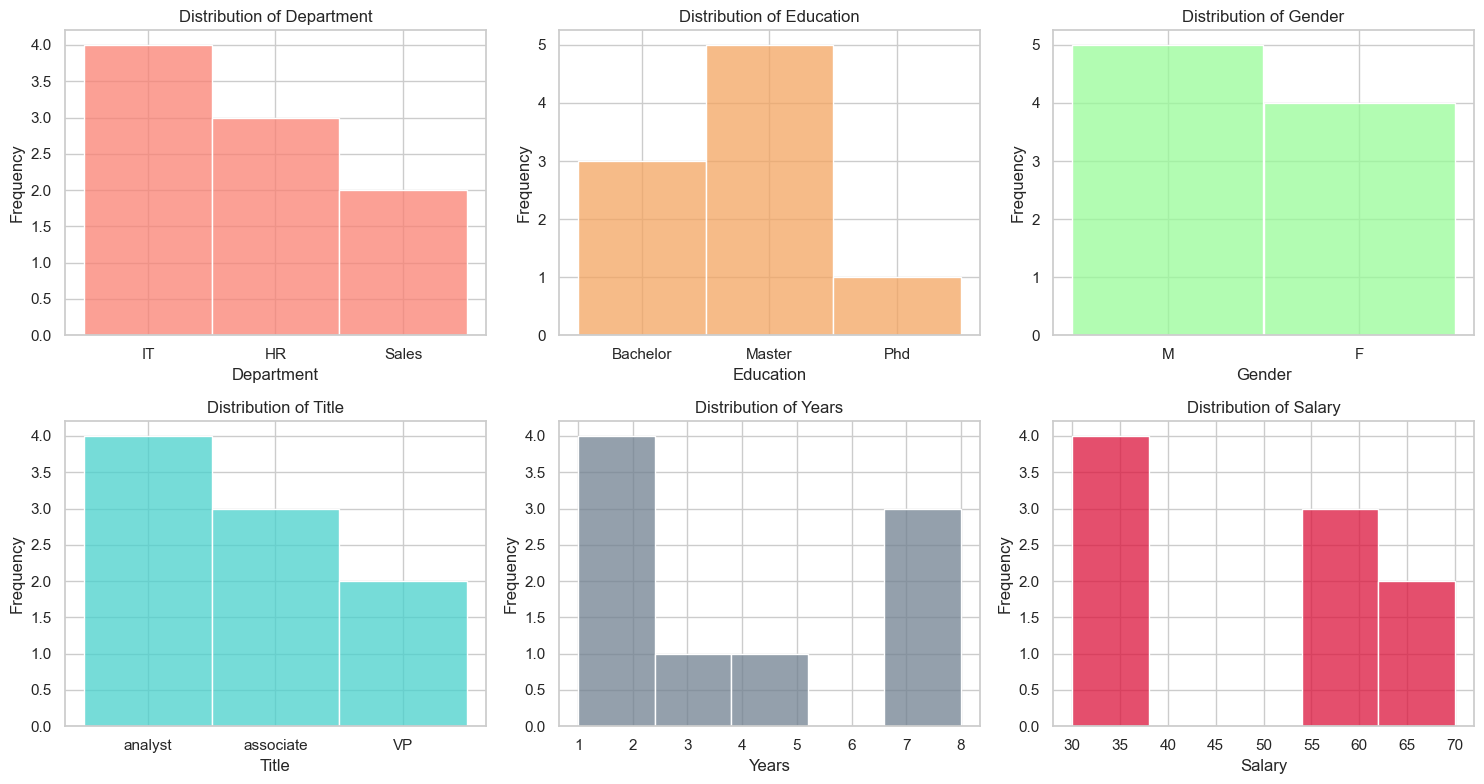

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

sns.histplot(x=employee['Department'],color='salmon',  ax=axes[0, 0])
axes[0, 0].set_xlabel('Department')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Department')

sns.histplot(x=employee['Education'], color='sandybrown',  ax=axes[0, 1])
axes[0, 1].set_xlabel('Education')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Education')

sns.histplot(x=employee['Gender'], color='palegreen', ax=axes[0, 2])
axes[0, 2].set_xlabel('Gender')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Distribution of Gender')

sns.histplot(x=employee['Title'], color='mediumturquoise', ax=axes[1, 0])
axes[1, 0].set_xlabel('Title')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Title')

sns.histplot(x=employee['Years'], color='slategrey', ax=axes[1, 1])
axes[1, 1].set_xlabel('Years')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Years')

sns.histplot(x=employee['Salary'], color='crimson', ax=axes[1, 2])
axes[1, 2].set_xlabel('Salary')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Distribution of Salary')

plt.tight_layout()

plt.show()


In [18]:
"""
The distribution of Department is higher towards the IT deparment.

The distribution of Education is higher in the Master Education 

The distribution of Gender is quite similar but still higher frequency in Male gender.

The distribution of Title is higher in Analyst.

The distribution of Years is higher between the 1 to 2 years.

The distribution of Salary is higher between aproximately 30 to 37.

"""

'\nThe distribution of Department is higher towards the IT deparment.\n\nThe distribution of Education is higher in the Master Education \n\nThe distribution of Gender is quite similar but still higher frequency in Male gender.\n\nThe distribution of Title is higher in Analyst.\n\nThe distribution of Years is higher between the 1 to 2 years.\n\nThe distribution of Salary is higher between aproximately 30 to 37.\n\n'

#### What's the average salary in this company?

In [19]:
#we will take in account that each nnumber of salary in the salry columnstands for thousands being 48 = 48 000
employee["Salary"].mean()

48.888888888888886

#### What's the highest salary?

In [20]:
employee["Salary"].max()

70

#### What's the lowest salary?

In [21]:
lowest_salary = employee["Salary"].min()

lowest_salary 

30

#### Who are the employees with the lowest salary?

In [22]:
employee.query("Salary == Salary.min()")[["Name"]]

,Name
1,Maria
2,David


#### Could you give all the information about an employee called David?

In [23]:
employee.loc[employee['Name'] == 'David']


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


In [24]:
employee.query("Name == 'David'")

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [25]:
employee.query("Name == 'David'")[["Salary"]]


,Salary
2,30


#### Print all the rows where job title is associate

In [26]:
employee.query("Title == 'associate'")

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [27]:
employee.head(3)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [28]:
employee.iloc[:3]


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [29]:
employee.query("Title == 'associate' & Salary > 55")

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [30]:
employee.groupby("Years")["Salary"].mean().reset_index()

,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average Salary per title?

In [31]:
employee.groupby("Title")["Salary"].mean().reset_index()

,Title,Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

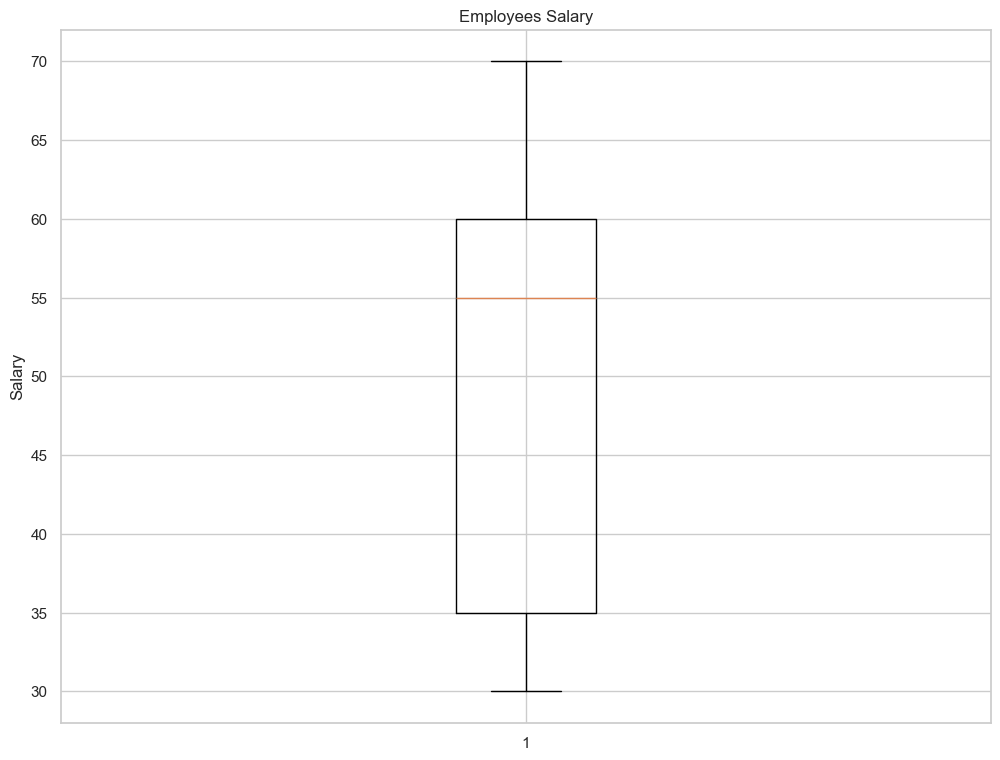

In [66]:
plt.figure(figsize=(12, 9))
plt.boxplot(employee['Salary'],)
plt.title('Employees Salary')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [70]:
employee["Salary"].quantile(0.75)

60.0

In [71]:
employee["Salary"].quantile(0.25)

35.0

#### Is the mean salary per gender different?

In [72]:
employee.groupby("Gender")["Salary"].mean().reset_index()

,Gender,Salary
0,F,47.5
1,M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [86]:
func = {'Salary': ['min', 'mean', 'max'], 'Years': ['min', 'mean', 'max']}
result = employee.groupby('Department').agg(func)

result
    

Salary            Years              
              min   mean max   min      mean max
Department                                      
HR             30  45.00  70     2  4.666667   8
IT             30  48.75  70     1  4.500000   8
Sales          55  55.00  55     2  2.500000   3

In [77]:
employee["Salary"].mean()

48.888888888888886

In [78]:

employee["Salary"].max()

70

In [79]:
employee["Salary"].min()

30

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [37]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [89]:
orders = pd.read_csv("orders.csv")
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [90]:
orders.dtypes
#we now will work with also integers 


Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

####  What is the average Purchase Price?

In [91]:
orders["amount_spent"].mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [93]:
orders["amount_spent"].max()

168469.6

In [92]:
orders["amount_spent"].min()

0.0

#### Select all the customers we have in Spain

In [136]:
total_unique_values = orders.query("Country == 'Spain'")["CustomerID"].unique()
unique_customer = pd.DataFrame(total_unique_values, columns=['CustomerID'])
unique_customer


,CustomerID
0,12557
1,17097
2,12540
3,12551
4,12484
5,12539
6,12510
7,12421
8,12502
9,12462


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [111]:
orders.query("Country == 'Spain'")[["CustomerID"]].value_counts().count()

30

#### Select all the customers who have bought more than 50 items ?

In [139]:
rich = orders.query("Quantity > 50")[["CustomerID"]].value_counts().unique()
pd.DataFrame(rich)

,0
0,1266
1,454
2,431
3,370
4,309
...,...
71,5
72,4
73,3
74,2


#### Select orders from Spain that are above 50 items

In [118]:
orders.query("Country == 'Spain' & Quantity > 50")

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Select all free orders

In [138]:
orders.query("Quantity & UnitPrice == 0")

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
107192,157042,550188,22636,2011,4,4,18,childs breakfast set circus parade,1,2011-04-14 18:57:00,0.0,12457,Switzerland,0.0
194648,279324,561284,22167,2011,7,2,12,oval wall mirror diamante,1,2011-07-26 12:24:00,0.0,16818,United Kingdom,0.0
197173,282912,561669,22960,2011,7,4,17,jam making set with jars,11,2011-07-28 17:09:00,0.0,12507,Spain,0.0
199711,285657,561916,M,2011,8,1,11,manual,1,2011-08-01 11:44:00,0.0,15581,United Kingdom,0.0
256263,358655,568158,PADS,2011,9,7,12,pads to match all cushions,1,2011-09-25 12:22:00,0.0,16133,United Kingdom,0.0
259399,361825,568384,M,2011,9,2,9,manual,1,2011-09-27 09:46:00,0.0,12748,United Kingdom,0.0
286507,395529,571035,M,2011,10,4,12,manual,1,2011-10-13 12:50:00,0.0,12446,RSA,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [143]:
orders.query(("Description.str.contains('lunch bag')"), engine = "python")

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [145]:
orders.query(("Description.str.contains('lunch bag') & year == 2011"), engine = "python")

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

In [156]:
ht = orders.query("Country == 'Spain'")

TypeError: 'Axes' object is not subscriptable

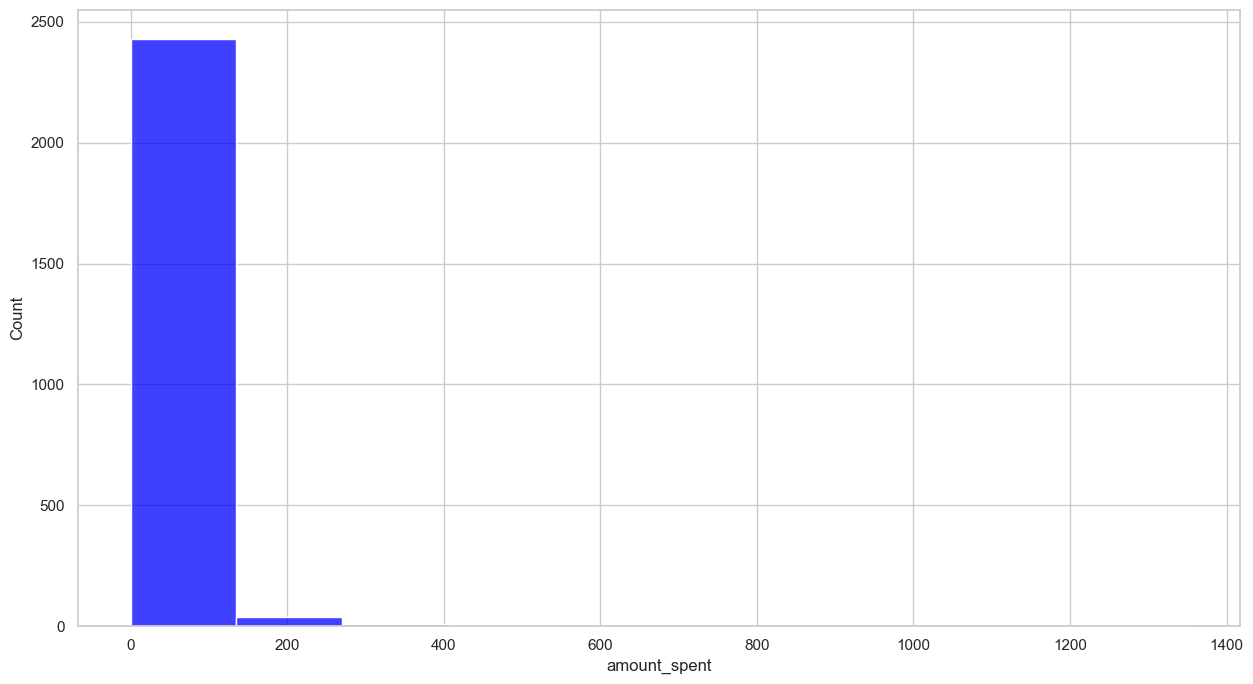

In [161]:
fig, axes = plt.subplots(figsize=(15, 8))

sns.histplot(x=ht["amount_spent"],color='blue', bins = 10)
axes[0, 0].set_xlabel('Department')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Department')

#### Select all orders made in the month of August

In [171]:
orders.query("month == 8")

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [179]:
orders[orders['month'] == 8]["Country"].value_counts()



Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: count, dtype: int64

#### What's the  average amount of money spent by country

In [181]:
orders.groupby('Country')['amount_spent'].mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [185]:
max_price = orders["UnitPrice"].idxmax()
orders.loc[max_price]

Unnamed: 0                   173382
InvoiceNo                    551697
StockCode                      POST
year                           2011
month                             5
day                               2
hour                             13
Description                 postage
Quantity                          1
InvoiceDate     2011-05-03 13:46:00
UnitPrice                   8142.75
CustomerID                    16029
Country              United Kingdom
amount_spent                8142.75
Name: 118352, dtype: object

#### What was the average amount spent per year ?

In [192]:
orders.groupby('year')['amount_spent'].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64